In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\Pavan Ghodkhande\\Downloads\\Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [7]:
df['month']=df['Date'].dt.month_name()

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [9]:
daily=df['Date'].value_counts()


In [10]:
daily=pd.DataFrame(daily).reset_index()

In [11]:
daily.rename(columns={'index':'Date','Date':'Count'},inplace=True)

In [12]:
daily

,Date,Count
0,2015-06-24,218
1,2015-06-23,190
2,2015-06-25,98
3,2015-06-26,55
4,2015-06-30,53
...,...,...
86,2015-05-10,7
87,2015-05-24,7
88,2015-04-05,6
89,2015-04-11,5


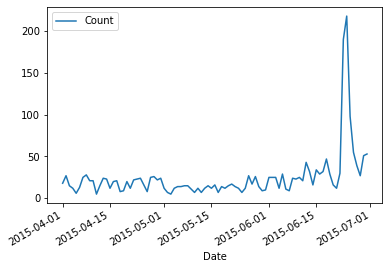

In [13]:
daily.plot(x='Date',y='Count',kind='line')
plt.show()


In [15]:
df.groupby('month').count()['Ticket #']

month
April     545
June     1280
May       399
Name: Ticket #, dtype: int64

In [16]:
mnth=pd.DataFrame(df.groupby('month').count()['Ticket #']).reset_index()

In [17]:
mnth

,month,Ticket #
0,April,545
1,June,1280
2,May,399


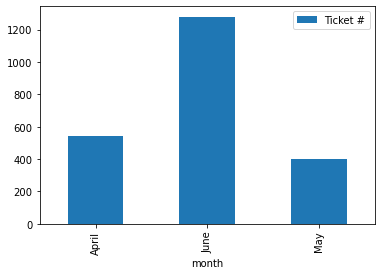

In [18]:
mnth.plot(x='month',y='Ticket #',kind='bar')
plt.show()

<AxesSubplot:>

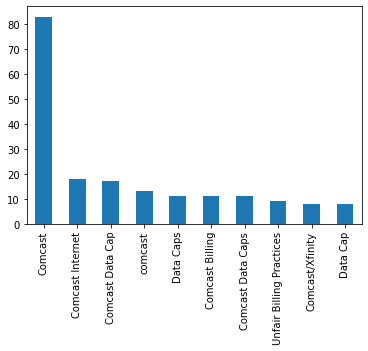

In [19]:
df['Customer Complaint'].value_counts()[:10].plot.bar()

In [20]:
internet_issue1=df[df['Customer Complaint'].str.contains('speed')].count()['Ticket #']

In [21]:
internet_issue2=df[df['Customer Complaint'].str.contains('network')].count()['Ticket #']

In [22]:
internet_issue3=df[df['Customer Complaint'].str.contains('data')].count()['Ticket #']

In [23]:
total_internet_issue=internet_issue1+internet_issue2+internet_issue3

In [24]:
total_internet_issue

179

In [28]:

billing_issue1=df[df['Customer Complaint'].str.contains('billing')].count()['Ticket #']

billing_issue2=df[df['Customer Complaint'].str.contains('charges')].count()['Ticket #']

total_billing_issue=billing_issue1+billing_issue2

In [29]:
total_billing_issue

169

In [30]:
service_issue1=df[df['Customer Complaint'].str.contains('service')].count()['Ticket #']

service_issue2=df[df['Customer Complaint'].str.contains('customer')].count()['Ticket #']

total_service_issue=service_issue1+service_issue2

In [31]:
total_service_issue

360

In [32]:
total_billing_issue,total_internet_issue,total_service_issue

(169, 179, 360)

In [33]:
other=2224-(169+179+360)

In [34]:
other

1516

In [35]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [36]:
df['newstatus']=['Open' if st=='Open' or st=='Pending' else 'Close' for st in df['Status'] ]

In [37]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,newstatus
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Close
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Close
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Close
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Close


In [38]:
state_cmp=df.groupby(['State','newstatus']).size().unstack()

<AxesSubplot:xlabel='State'>

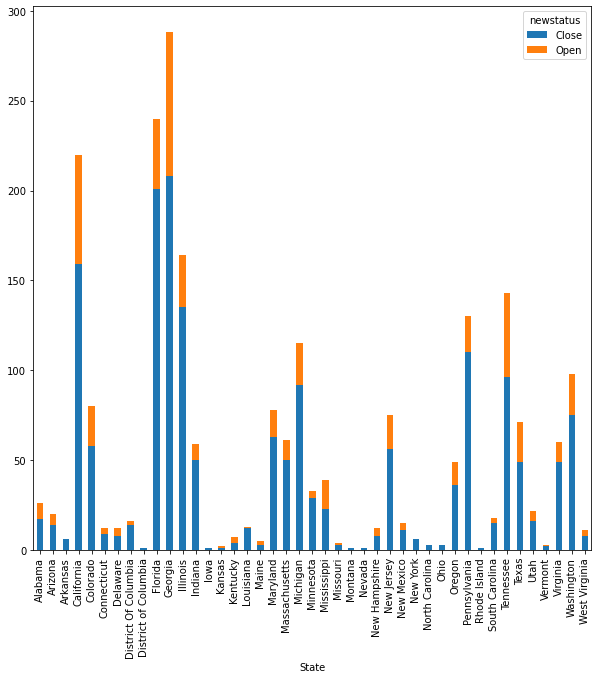

In [39]:
state_cmp.plot.bar(stacked=True,figsize=(10,10))

In [40]:
df.groupby('State').count()['Ticket #'].sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: Ticket #, dtype: int64

In [41]:
unresolved_data=df.groupby(['State','newstatus']).size().unstack().fillna(0).sort_values('Open',ascending=False)

unresolved_data['unresolved_cmp_prct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100

In [42]:
unresolved_data

newstatus,Close,Open,unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


In [43]:
resolved_data=df.groupby(['Received Via','newstatus']).size().unstack()

resolved_data['resolved']=resolved_data['Close']/resolved_data['Close'].sum()*100

In [44]:
resolved_data['resolved']


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64